# ============================================
# Module 9b: Foundations of Training & Transformers
# Lab 3 – Inside BERT: Blocks, Shapes & Attention
# ============================================
**Author:** Dr. Dasha Trofimova

### Learning Goals
- Visualize BERT dataflow from text to logits
- Inspect tokenization, IDs, and tensor shapes
- Understand (at high level) multi-head self-attention

---


In [ ]:
!pip install transformers torch graphviz --quiet
from transformers import BertTokenizer, BertModel
import torch, graphviz, matplotlib.pyplot as plt, numpy as np

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

text = "Transformers are powerful models for language understanding."
tokens = tokenizer(text, return_tensors="pt")
with torch.no_grad():
    out = model(**tokens)

print("Decoded tokens:", tokenizer.convert_ids_to_tokens(tokens["input_ids"][0]))
print("input_ids:", tokens["input_ids"].shape, " (batch, seq_len)")
print("attention_mask:", tokens["attention_mask"].shape)
print("last_hidden_state:", out.last_hidden_state.shape, " (batch, seq_len, hidden=768)")
print("pooler_output:", out.pooler_output.shape, " (batch, hidden=768)")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Decoded tokens: ['[CLS]', 'transformers', 'are', 'powerful', 'models', 'for', 'language', 'understanding', '.', '[SEP]']
input_ids: torch.Size([1, 10])  (batch, seq_len)
attention_mask: torch.Size([1, 10])
last_hidden_state: torch.Size([1, 10, 768])  (batch, seq_len, hidden=768)
pooler_output: torch.Size([1, 768])  (batch, hidden=768)


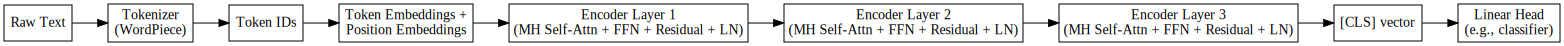

In [ ]:
# BERT block diagram (Graphviz)
g = graphviz.Digraph(format='png')
g.attr(rankdir='LR', fontsize='11')

g.node('text', 'Raw Text', shape='box')
g.node('tok', 'Tokenizer\n(WordPiece)', shape='box')
g.node('ids', 'Token IDs', shape='box')
g.node('emb', 'Token Embeddings +\nPosition Embeddings', shape='box')

for i in range(1,4):  # show 3 of 12 layers
    g.node(f'enc{i}', f'Encoder Layer {i}\n(MH Self-Attn + FFN + Residual + LN)', shape='box')

g.node('cls', '[CLS] vector', shape='box')
g.node('head', 'Linear Head\n(e.g., classifier)', shape='box')

g.edges([('text','tok'),('tok','ids'),('ids','emb'),
         ('emb','enc1'),('enc1','enc2'),('enc2','enc3'),
         ('enc3','cls'),('cls','head')])

display(g)

### 🎯 Quick Card Quiz — Inside BERT

**Color legend:**  
- **Blue = Tokenization/Input IDs**  
- **Orange = Embeddings (token + positional)**  
- **Green = Encoder/Attention stack + [CLS] output**

1) Where are positional embeddings added?
2) Which block computes self-attention?
3) For classification, which vector is typically used by the linear head?


In [ ]:
# Conceptual multi-head attention schematic (cartoon)
heads = 8
plt.figure(figsize=(7,2))
for h in range(heads):
    x = np.linspace(0,1,10)
    y = np.sin(2*np.pi*(h+1)*x)*0.1 + 0.2*h/heads
    plt.plot(x, y)
plt.title("Concept: multiple heads attend to different patterns")
plt.yticks([]); plt.xlabel("Token positions →"); plt.tight_layout(); plt.show()